<a href="https://colab.research.google.com/github/hadycoul12/Projet-personnel/blob/master/Projet_1_WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partie 1 : Exploration d'une catégorie**

**Le URL Choisi :** Catégorie:Apprentissage automatique — Wikipédia

Brève description de la structure de la page et des éléments HTML pertinents.
La page contient une liste des articles et des sous-catégories.
Les articles et les sous-catégories sont généralement affichés dans des éléments `<li>`
contenus dans une liste `<ul>` ou `<ol>`.  
Les titres des articles et sous-catégories sont des liens `<a>` vers leurs pages respectives.
On pourrait utiliser une classe CSS spécifique pour les différencier (sous-catégorie ou article) mais ce n'est pas toujours garanti.
Nous pouvons analyser les URLs des sous-catégories contiennent généralement "Catégorie:" ou "Special:Category". Les articles ont des URLs différentes.  Cela pourrait être une méthode fiable.

# **Partie 2 : Scraping des pages Wikipédia**

# **1.	Codez une fonction extraire_sous_categories qui extrait la liste des sous-catégories (scraping). Utilisez BeautifulSoup dans cet exercice.**

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique"

def extraire_sous_categories(url):

    try:
        response = requests.get(url)
        response.raise_for_status()  # Vérifie si la requête a réussi

        soup = BeautifulSoup(response.content, 'html.parser')
        sous_categories = []

        # Trouver tous les liens dans la page
        for link in soup.find_all('a'):
            href = link.get('href')
            if href and (href.startswith('/wiki/Catégorie:') or href.startswith('/wiki/Special:Category')):
                sous_categories.append("https://fr.wikipedia.org" + href) # Ajouter le préfixe à l'url

        return sous_categories

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête : {e}")
        return []



# **2.	Codez une fonction extraire_pages qui extrait la liste des pages d'une sous-catégorie**

In [ ]:
def extraire_pages(url_sous_categorie):


    try:
        response = requests.get(url_sous_categorie)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        pages = []

        # Trouver tous les liens dans la page et identifier les pages (exclure les sous-catégories et les autres liens)
        for link in soup.find_all('a'):
            href = link.get('href')
            if href and href.startswith('/wiki/') and not (href.startswith('/wiki/Catégorie:') or href.startswith('/wiki/Special:Category')):
                pages.append("https://fr.wikipedia.org" + href)
        return pages

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête : {e}")
        return []

# **3.	Codez une fonction extraire_toutes_pages qui prend l’url de la catégorie et récupère la liste des url des tous les articles (y compris via des sous-catégorie).**

In [ ]:
import requests
from bs4 import BeautifulSoup

def extraire_toutes_pages(url_categorie):

    toutes_pages = []

    def extraire_pages_recursif(url):
        pages = extraire_pages(url)
        toutes_pages.extend(pages)

        sous_categories = extraire_sous_categories(url)
        for sous_categorie in sous_categories:
            extraire_pages_recursif(sous_categorie)

    extraire_pages_recursif(url_categorie)
    return toutes_pages

# Exemple d'utilisation
url_categorie = "https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique"
toutes_les_pages = extraire_toutes_pages(url_categorie)



In [ ]:
for page in toutes_les_pages:
    print(page)

https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Accueil_principal
https://fr.wikipedia.org/wiki/Portail:Accueil
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Page_au_hasard
https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Contact
https://fr.wikipedia.org/wiki/Aide:D%C3%A9buter
https://fr.wikipedia.org/wiki/Aide:Accueil
https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C3%A9
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes
https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Accueil_principal
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Recherche
https://fr.wikipedia.org/wiki/Aide:Premiers_pas
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Mes_contributions
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Mes_discussions
https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique
https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique
https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique
https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Pag

# **4.	Appliquez votre fonction et sauvegardez la liste des url obtenu**


In [ ]:
# Exemple d'utilisation
url_categorie = "https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique"
toutes_les_pages = extraire_toutes_pages(url_categorie)

# Sauvegarde des URLs dans un fichier
with open("urls_wikipedia.txt", "w") as f:
    for page in toutes_les_pages:
        f.write(page + "\n")

# **5.	Codez une fonction extraire_informations_page qui prend en entrée une url wiki et extrait**
○	(1) le titre
○	(2) les liens vers des articles wiki
○	(3) les catégories de l'article
○	(4) la liste des portails
○	(5) la taille en mots de l'article

In [ ]:
import requests
from bs4 import BeautifulSoup

def extraire_informations_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraire le titre de l'article
        titre = soup.find('h1', id='firstHeading').text if soup.find('h1', id='firstHeading') else "Titre non trouvé"

        # Extraire les liens vers d'autres articles Wikipédia
        liens = []
        for link in soup.find_all('a'):
            href = link.get('href')
            if href and href.startswith('/wiki/') and ':' not in href:
                liens.append("https://fr.wikipedia.org" + href)

        # Extraire les catégories de l'article
        categories = []
        catlinks = soup.find('div', {'id': 'mw-normal-catlinks'})  # Div contenant les catégories
        if catlinks:
            for link in catlinks.find_all('a'):
                categories.append(link.text)

        # Extraire les portails associés à l'article
        portails = []
        for link in soup.find_all('a', title=lambda x: x and x.startswith("Portail:")):
            portails.append(link.text)

        # Calculer la taille de l'article en nombre de mots
        taille = 0
        for paragraph in soup.find_all('p'):
            taille += len(paragraph.text.split())

        # Retourner les informations sous forme de liste contenant un dictionnaire
        return [{
            "titre_article": titre,
            "url_article": url,
            "liens_dans_article": liens,
            "categorie_article": categories,
            "portails_article": portails,
            "taille_article": taille
        }]
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête : {e}")
        return []
    except Exception as e:
        print(f"Erreur lors du parsing : {e}")
        return []


In [ ]:
# URL d'exemple
url_test = "https://fr.wikipedia.org/wiki/Apprentissage_automatique"

# Appeler la fonction
resultat = extraire_informations_page(url_test)

# Affichage du résultat
import json
print(json.dumps(resultat, indent=4, ensure_ascii=False))  # Affichage formaté


[
    {
        "titre_article": "Apprentissage automatique",
        "url_article": "https://fr.wikipedia.org/wiki/Apprentissage_automatique",
        "liens_dans_article": [
            "https://fr.wikipedia.org/wiki/Apprentissage_automatique",
            "https://fr.wikipedia.org/wiki/Apprentissage_automatique",
            "https://fr.wikipedia.org/wiki/Apprentissage_automatique",
            "https://fr.wikipedia.org/wiki/Apprentissage_(homonymie)",
            "https://fr.wikipedia.org/wiki/Machine_Learning_(revue)",
            "https://fr.wikipedia.org/wiki/Intelligence_artificielle",
            "https://fr.wikipedia.org/wiki/Apprentissage_incr%C3%A9mental",
            "https://fr.wikipedia.org/wiki/Apprentissage_supervis%C3%A9",
            "https://fr.wikipedia.org/wiki/Apprentissage_non_supervis%C3%A9",
            "https://fr.wikipedia.org/wiki/Apprentissage_par_renforcement",
            "https://fr.wikipedia.org/wiki/Anglais",
            "https://fr.wikipedia.org/wiki

# **6.	Extraire ces informations pour toutes les pages de la catégorie. Sauvegardez les données extraites en JSON ou en CSV.**

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import csv

def extraire_informations_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraire le titre de l'article
        titre = soup.find('h1', id='firstHeading').text if soup.find('h1', id='firstHeading') else "Titre non trouvé"

        # Extraire les liens vers d'autres articles Wikipédia
        liens = []
        for link in soup.find_all('a'):
            href = link.get('href')
            if href and href.startswith('/wiki/') and ':' not in href:
                liens.append("https://fr.wikipedia.org" + href)

        # Extraire les catégories de l'article
        categories = []
        catlinks = soup.find('div', {'id': 'mw-normal-catlinks'})  # Div contenant les catégories
        if catlinks:
            for link in catlinks.find_all('a'):
                categories.append(link.text)

        # Extraire les portails associés à l'article
        portails = []
        for link in soup.find_all('a', title=lambda x: x and x.startswith("Portail:")):
            portails.append(link.text)

        # Calculer la taille de l'article en nombre de mots
        taille = 0
        for paragraph in soup.find_all('p'):
            taille += len(paragraph.text.split())

        # Retourner les informations sous forme de dictionnaire
        return {
            "titre_article": titre,
            "url_article": url,
            "liens_dans_article": liens,
            "categorie_article": categories,
            "portails_article": portails,
            "taille_article": taille
        }
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête : {e}")
        return None
    except Exception as e:
        print(f"Erreur lors du parsing : {e}")
        return None

def extraire_liens_articles_categorie(url_categorie):
    try:
        response = requests.get(url_categorie)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Trouver tous les articles dans la catégorie
        liens_articles = []
        for link in soup.find_all('a', href=True):
            href = link.get('href')
            if href.startswith('/wiki/') and ':' not in href:
                liens_articles.append("https://fr.wikipedia.org" + href)

        return list(set(liens_articles))  # Supprimer les doublons
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête : {e}")
        return []
    except Exception as e:
        print(f"Erreur lors du parsing : {e}")
        return []

def extraire_donnees_categorie(url_categorie):
    # Obtenir tous les liens d'articles dans la catégorie
    liens_articles = extraire_liens_articles_categorie(url_categorie)

    # Extraire les informations pour chaque article
    donnees = []
    for url in liens_articles:
        print(f"Extraction des informations pour : {url}")
        infos = extraire_informations_page(url)
        if infos:  # Ajouter uniquement si l'extraction réussit
            donnees.append(infos)

    return donnees

def sauvegarder_json(donnees, nom_fichier):
    with open(nom_fichier, 'w', encoding='utf-8') as fichier:
        json.dump(donnees, fichier, ensure_ascii=False, indent=4)

def sauvegarder_csv(donnees, nom_fichier):
    with open(nom_fichier, 'w', encoding='utf-8', newline='') as fichier:
        champs = ["titre_article", "url_article", "liens_dans_article", "categorie_article", "portails_article", "taille_article"]
        writer = csv.DictWriter(fichier, fieldnames=champs)

        writer.writeheader()
        for ligne in donnees:
            writer.writerow({
                "titre_article": ligne["titre_article"],
                "url_article": ligne["url_article"],
                "liens_dans_article": ', '.join(ligne["liens_dans_article"]),
                "categorie_article": ', '.join(ligne["categorie_article"]),
                "portails_article": ', '.join(ligne["portails_article"]),
                "taille_article": ligne["taille_article"]
            })

# Exemple d'utilisation
if __name__ == "__main__":
    url_categorie = "https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Apprentissage_automatique"
    donnees = extraire_donnees_categorie(url_categorie)

    # Sauvegarder en JSON
    sauvegarder_json(donnees, "donnees_apprentissage_automatique.json")

    # Sauvegarder en CSV
    sauvegarder_csv(donnees, "donnees_apprentissage_automatique.csv")

    print("Extraction terminée et données sauvegardées.")


Extraction des informations pour : https://fr.wikipedia.org/wiki/Fashion_MNIST
Extraction des informations pour : https://fr.wikipedia.org/wiki/Partitionnement_de_donn%C3%A9es
Extraction des informations pour : https://fr.wikipedia.org/wiki/Temporal_difference_learning
Extraction des informations pour : https://fr.wikipedia.org/wiki/Principe_d%27entropie_maximale
Extraction des informations pour : https://fr.wikipedia.org/wiki/QUEST_(arbre_de_d%C3%A9cision)
Extraction des informations pour : https://fr.wikipedia.org/wiki/Microsoft_Cognitive_Toolkit
Extraction des informations pour : https://fr.wikipedia.org/wiki/D%C3%A9rive_conceptuelle
Extraction des informations pour : https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support
Extraction des informations pour : https://fr.wikipedia.org/wiki/Apprentissage_de_repr%C3%A9sentations
Extraction des informations pour : https://fr.wikipedia.org/wiki/F-mesure
Extraction des informations pour : https://fr.wikipedia.org/wiki/Complexit%C3%

# **Partie 3 : Analyse statistique**


# **1.	Réalisez un aperçu rapide des données. Déterminez si un nettoyage est nécessaire ou non.**

In [ ]:
import pandas as pd
import json

# Charger les données depuis le fichier JSON
with open("donnees_apprentissage_automatique.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Créer un DataFrame pandas
df = pd.DataFrame(data)

# Aperçu rapide des données et vérification du nettoyage
print(df.head())

                  titre_article  \
0                 Fashion MNIST   
1    Partitionnement de données   
2  Temporal difference learning   
3  Principe d'entropie maximale   
4     QUEST (arbre de décision)   

                                         url_article  \
0        https://fr.wikipedia.org/wiki/Fashion_MNIST   
1  https://fr.wikipedia.org/wiki/Partitionnement_...   
2  https://fr.wikipedia.org/wiki/Temporal_differe...   
3  https://fr.wikipedia.org/wiki/Principe_d%27ent...   
4  https://fr.wikipedia.org/wiki/QUEST_(arbre_de_...   

                                  liens_dans_article  \
0  [https://fr.wikipedia.org/wiki/Fashion_MNIST, ...   
1  [https://fr.wikipedia.org/wiki/Partitionnement...   
2  [https://fr.wikipedia.org/wiki/Temporal_differ...   
3  [https://fr.wikipedia.org/wiki/Principe_d%27en...   
4  [https://fr.wikipedia.org/wiki/QUEST_(arbre_de...   

                                   categorie_article  \
0  [Catégories, Jeu de données, Science des donné...   
1  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   titre_article       172 non-null    object
 1   url_article         172 non-null    object
 2   liens_dans_article  172 non-null    object
 3   categorie_article   172 non-null    object
 4   portails_article    172 non-null    object
 5   taille_article      172 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.2+ KB
None


In [ ]:
print(df.describe(include= "all")) # Statistiques descriptives


        titre_article                                  url_article  \
count             172                                          172   
unique            172                                          172   
top     Fashion MNIST  https://fr.wikipedia.org/wiki/Fashion_MNIST   
freq                1                                            1   
mean              NaN                                          NaN   
std               NaN                                          NaN   
min               NaN                                          NaN   
25%               NaN                                          NaN   
50%               NaN                                          NaN   
75%               NaN                                          NaN   
max               NaN                                          NaN   

                                       liens_dans_article  \
count                                                 172   
unique                               

# **2.	Quelles sous-catégories sont les plus fréquentes ?**

In [ ]:
from collections import Counter

# Flatten the list of categories and count their frequencies
all_categories = [cat for sublist in df['categorie_article'] for cat in sublist]
category_counts = Counter(all_categories)

# Print the most frequent subcategories
print(category_counts.most_common(10))

[('Apprentissage automatique', 171), ('Catégories', 136), ('Exploration de données', 42), ('Catégorie', 36), ('Intelligence artificielle', 24), ('Science des données', 23), ('Réseau de neurones artificiels', 17), ('Algorithme de classification', 14), ('Informatique théorique', 10), ('Statistiques', 9)]


# **3.	Quelle est la longueur moyenne d'une page ?**

In [ ]:
average_page_length = df['taille_article'].mean()
print(f"La longueur moyenne d'une page est : {average_page_length}")

La longueur moyenne d'une page est : 851.2151162790698


# **4.	Quels articles sont les plus cités ?**



In [ ]:
all_links = [link for sublist in df['liens_dans_article'] for link in sublist]

link_counts = Counter(all_links)

most_cited_articles = link_counts.most_common(10)

print("Most cited articles:")
for article, count in most_cited_articles:
    print(f"{article}: {count} citations")

Most cited articles:
https://fr.wikipedia.org/wiki/Digital_Object_Identifier: 317 citations
https://fr.wikipedia.org/wiki/Apprentissage_automatique: 223 citations
https://fr.wikipedia.org/wiki/International_Standard_Book_Number: 196 citations
https://fr.wikipedia.org/wiki/501c: 174 citations
https://fr.wikipedia.org/wiki/Apprentissage_supervis%C3%A9: 150 citations
https://fr.wikipedia.org/wiki/International_Standard_Serial_Number: 137 citations
https://fr.wikipedia.org/wiki/Apprentissage_non_supervis%C3%A9: 132 citations
https://fr.wikipedia.org/wiki/R%C3%A9seau_de_neurones_artificiels: 129 citations
https://fr.wikipedia.org/wiki/Partitionnement_de_donn%C3%A9es: 112 citations
https://fr.wikipedia.org/wiki/R%C3%A9gression_(statistiques): 109 citations


# **5.	Synthétisez vos observations sous forme d’un ou plusieurs graphiques**

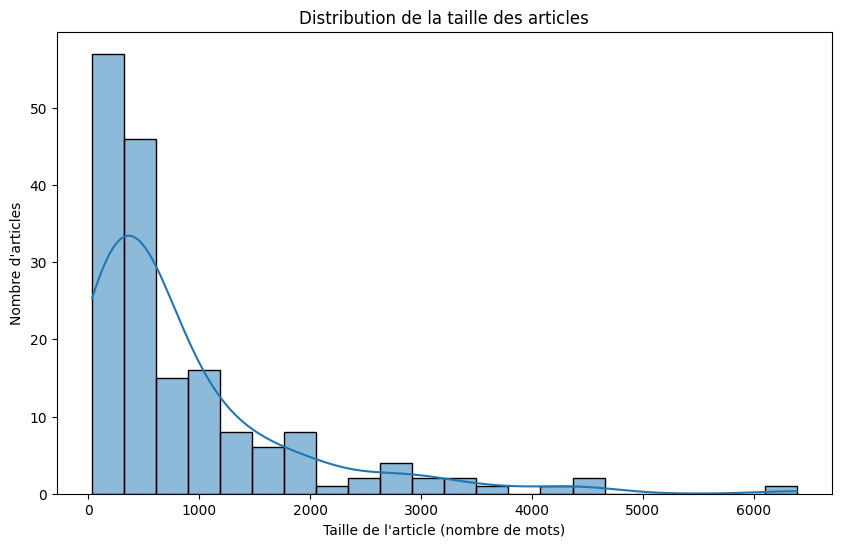

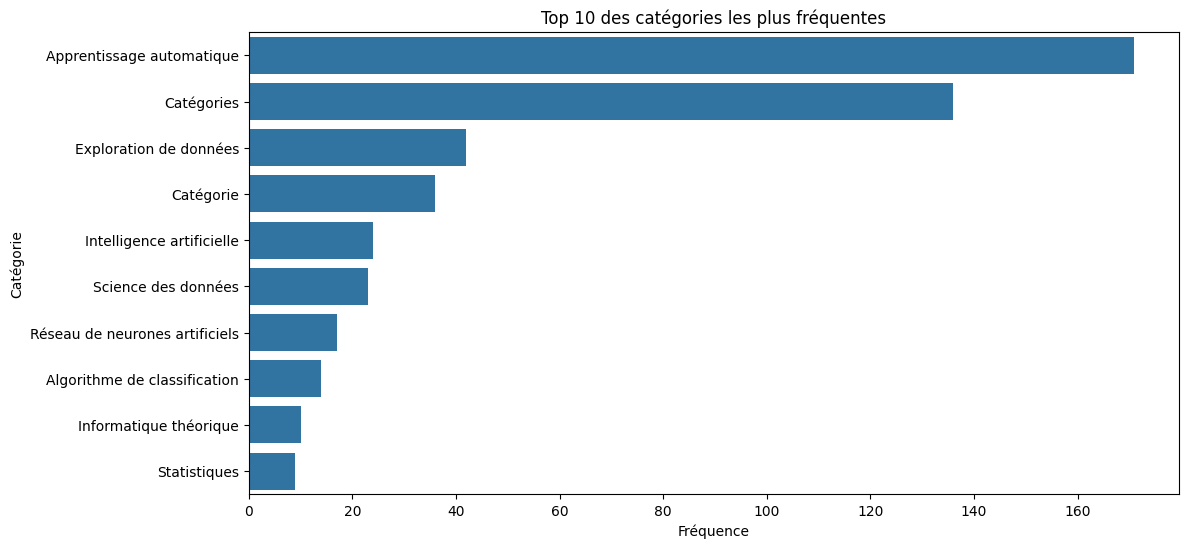

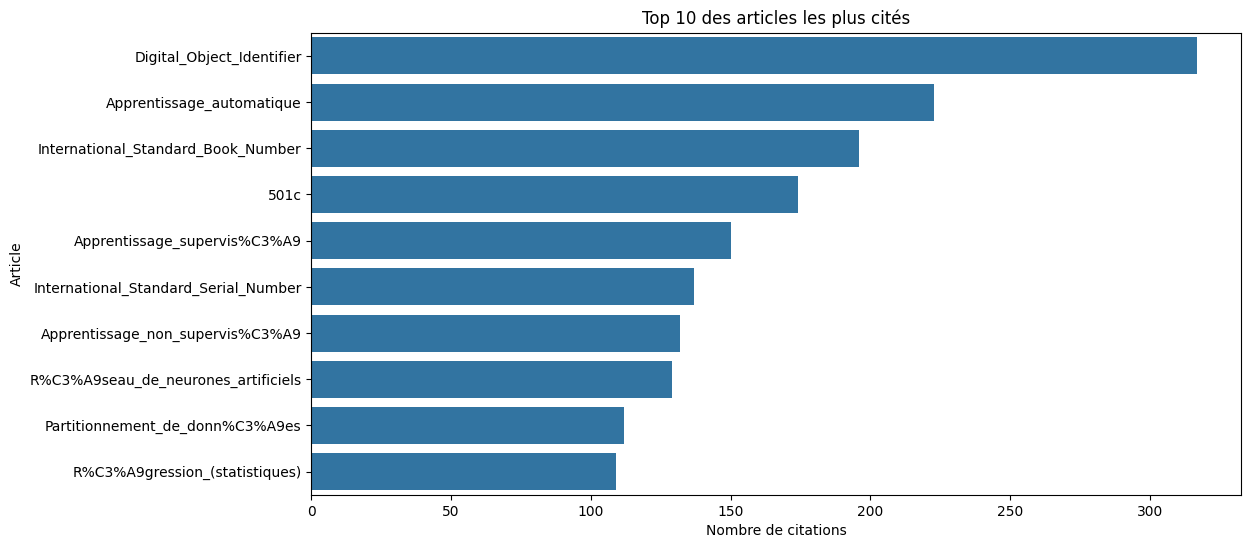

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution de la taille des articles
plt.figure(figsize=(10, 6))
sns.histplot(df['taille_article'], kde=True)
plt.title("Distribution de la taille des articles")
plt.xlabel("Taille de l'article (nombre de mots)")
plt.ylabel("Nombre d'articles")
plt.show()

# 2. Fréquence des catégories (top 10)
top_10_categories = category_counts.most_common(10)
categories, counts = zip(*top_10_categories)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=categories)
plt.title("Top 10 des catégories les plus fréquentes")
plt.xlabel("Fréquence")
plt.ylabel("Catégorie")
plt.show()

# 3. Articles les plus cités (top 10)
top_10_cited = link_counts.most_common(10)
articles, citations = zip(*top_10_cited)

# Shorten the article URLs for better display (optional)
short_articles = [article.split('/')[-1] for article in articles]

plt.figure(figsize=(12, 6))
sns.barplot(x=citations, y=short_articles)
plt.title("Top 10 des articles les plus cités")
plt.xlabel("Nombre de citations")
plt.ylabel("Article")
plt.show()

On remarque une distribution anormale de la taille des articles

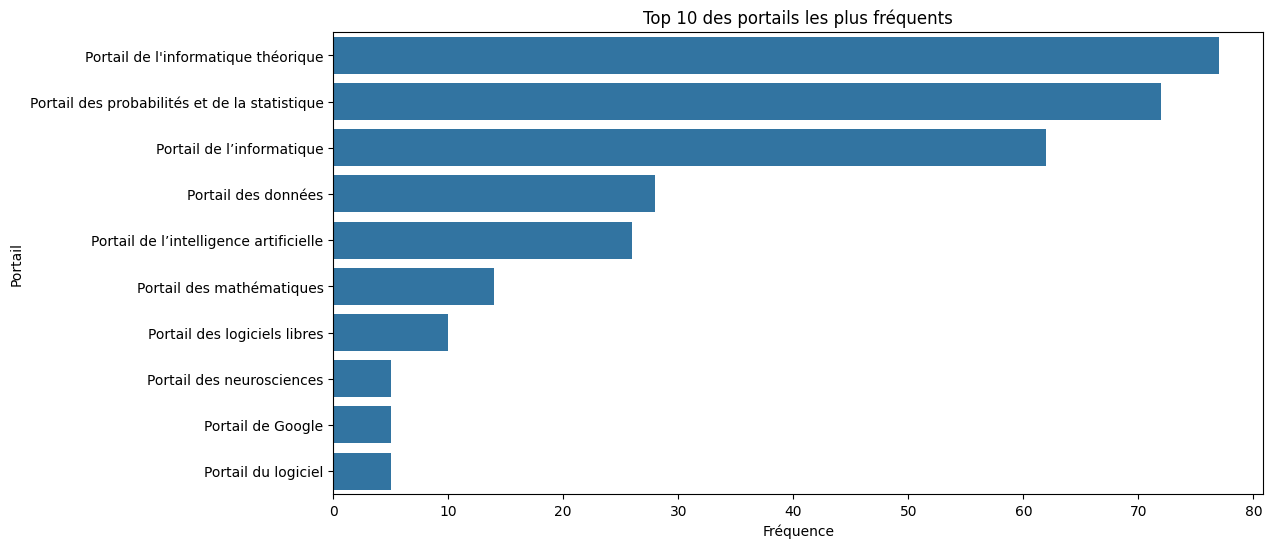

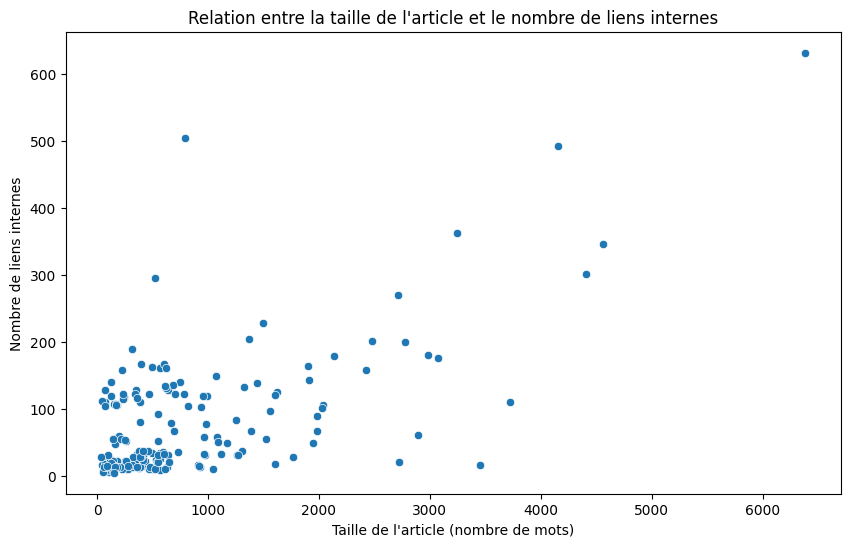

In [ ]:

all_portals = [portal for sublist in df['portails_article'] for portal in sublist]
portal_counts = Counter(all_portals)


top_10_portals = portal_counts.most_common(10)
portals, counts = zip(*top_10_portals)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=portals)
plt.title("Top 10 des portails les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Portail")
plt.show()


# 5. Relation entre la taille de l'article et le nombre de liens (New Graph)
plt.figure(figsize=(10,6))
sns.scatterplot(x='taille_article', y=df['liens_dans_article'].str.len(), data=df)
plt.title('Relation entre la taille de l\'article et le nombre de liens internes')
plt.xlabel('Taille de l\'article (nombre de mots)')
plt.ylabel('Nombre de liens internes')
plt.show()

Nous pouvons remarquer une corrélation positive entre les 2 variables. Le nombre de liens internes d'une article se voit éléver si la taille de l'article augmente

# **Partie 4 : Graphe de liens**

# **3.	Utilisez les données que vous avez collectées dans la partie 2 pour construire un graphe**

In [ ]:
!pip install networkx

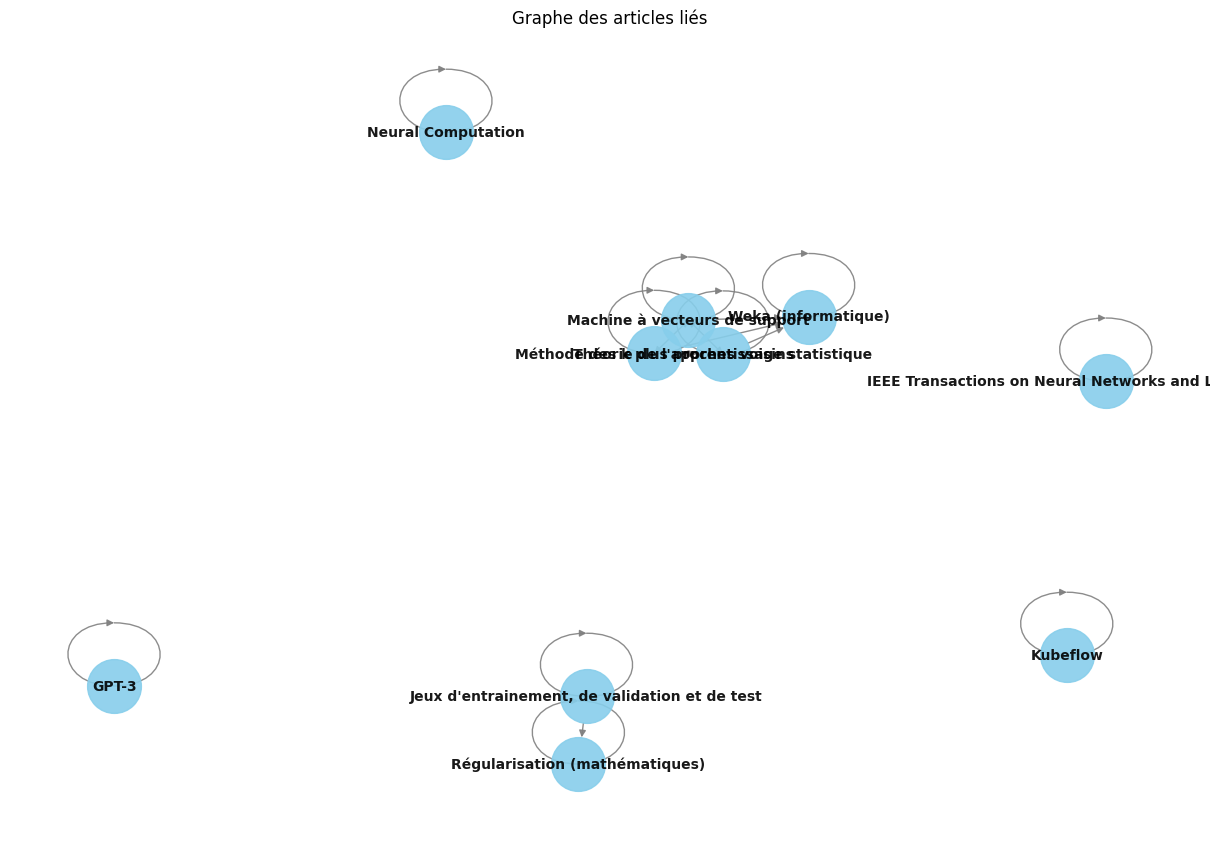

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import random

# Charger les données collectées depuis un fichier JSON
with open("donnees_apprentissage_automatique.json", "r", encoding="utf-8") as fichier:
    donnees = json.load(fichier)

# Limiter le graphe à un sous-ensemble aléatoire (par exemple, 10 articles)
nb_articles = 10
articles_selectionnes = random.sample(donnees, min(nb_articles, len(donnees)))  # Sous-ensemble aléatoire

# Créer une liste des relations (article -> lien)
relations = []
article_urls = {article["url_article"]: article["titre_article"] for article in articles_selectionnes}

for article in articles_selectionnes:
    for lien in article["liens_dans_article"]:
        if lien in article_urls:  # Si le lien est dans les articles sélectionnés
            relations.append((article["titre_article"], article_urls[lien]))

# Créer un graphe orienté
G = nx.DiGraph()

# Ajouter les nœuds (articles) et les arêtes (relations)
for article in articles_selectionnes:
    G.add_node(article["titre_article"])  # Ajouter chaque article comme un nœud
G.add_edges_from(relations)  # Ajouter les relations comme des arêtes orientées

# Configurer la visualisation
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positionner les nœuds pour une représentation esthétique

# Dessiner le graphe
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,  # Activer les flèches
    node_color="skyblue",
    edge_color="gray",
    node_size=1500,
    font_size=10,
    font_weight="bold",
    alpha=0.9
)

# Ajouter un titre
plt.title("Graphe des articles liés")
plt.show()


# **4.	Utilisez les fonctions de la librairie choisie pour afficher une représentation graphique du réseau de liens. Si besoin, réduisez le nombre de nœuds pour que l’affichage soit lisible.**

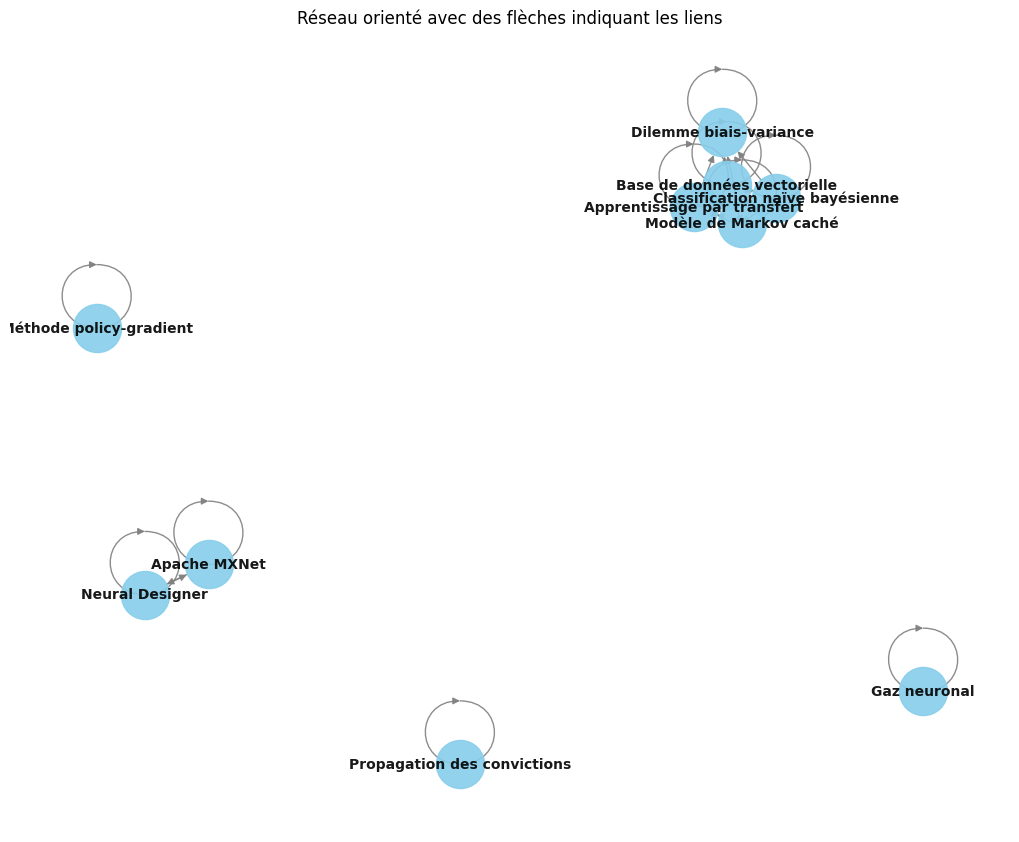

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import random

# Charger les données collectées depuis un fichier JSON
with open("donnees_apprentissage_automatique.json", "r", encoding="utf-8") as fichier:
    donnees = json.load(fichier)

# Limiter le nombre de nœuds (par exemple, 10 articles)
nb_noeuds = 10
articles_selectionnes = random.sample(donnees, min(nb_noeuds, len(donnees)))  # Sous-ensemble aléatoire

# Créer une liste des relations (article -> lien)
relations = []
article_urls = {article["url_article"]: article["titre_article"] for article in articles_selectionnes}

for article in articles_selectionnes:
    for lien in article["liens_dans_article"]:
        if lien in article_urls:  # Si le lien est dans les articles sélectionnés
            relations.append((article["titre_article"], article_urls[lien]))

# Créer un graphe orienté
G = nx.DiGraph()

# Ajouter les nœuds et arêtes
for article in articles_selectionnes:
    G.add_node(article["titre_article"])  # Ajouter les articles comme nœuds

G.add_edges_from(relations)  # Ajouter les relations comme arêtes

# Configurer la taille et les couleurs pour une meilleure lisibilité
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Algorithme pour positionner les nœuds

# Dessiner le graphe orienté avec des flèches
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,  # Activer les flèches
    node_color="skyblue",
    edge_color="gray",
    node_size=1200,
    font_size=10,
    font_weight="bold",
    alpha=0.9
)

plt.title("Réseau orienté avec des flèches indiquant les liens")
plt.show()



# **5.	Appliquez différentes mesures de centralité (degré, intermédiarité, proximité, etc.) pour identifier les nœuds les plus importants ou centraux du graphe.**

In [ ]:
import networkx as nx

# Assuming 'graph' is your NetworkX graph object created in the previous code

# Degree Centrality
degree_centrality = nx.degree_centrality(graph)
print("Centralité de degré :")
for node, centrality in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"  {node}: {centrality}")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(graph)
print("\nCentralité d'intermédiarité :")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"  {node}: {centrality}")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(graph)
print("\nCentralité de proximité :")
for node, centrality in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"  {node}: {centrality}")

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(graph)
print("\nCentralité de vecteur propre :")
for node, centrality in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"  {node}: {centrality}")

Centralité de degré :
  501c: 1.0116959064327484
  Apprentissage automatique: 0.7485380116959064
  Réseau de neurones artificiels: 0.5146198830409356
  Apprentissage profond: 0.49122807017543857
  Apprentissage supervisé: 0.49122807017543857
  Apprentissage par renforcement: 0.4444444444444444
  Apprentissage non supervisé: 0.4327485380116959
  Intelligence artificielle générative: 0.4152046783625731
  Réseau bayésien: 0.40350877192982454
  Partitionnement de données: 0.39766081871345027
  Machine à vecteurs de support: 0.39766081871345027
  Arbre de décision (apprentissage): 0.39766081871345027
  Méthode des k plus proches voisins: 0.391812865497076
  TensorFlow: 0.38596491228070173
  Boosting: 0.38596491228070173
  Microsoft Cognitive Toolkit: 0.38011695906432746
  Modèle génératif: 0.38011695906432746
  Forêt d'arbres décisionnels: 0.38011695906432746
  Modèle graphique: 0.38011695906432746
  Régression logistique: 0.3742690058479532
  Modèle de Markov caché: 0.3684210526315789
  Cl

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt


# Calculer les mesures de centralité
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph)


# Identifier les nœuds les plus importants selon chaque mesure

# Exemple : Top 5 nœuds par centralité de degré
top_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nœuds par centralité de degré:")
for node, centrality in top_degree:
    print(f"  {node}: {centrality}")


Top 5 nœuds par centralité de degré:
  501c: 1.0116959064327484
  Apprentissage automatique: 0.7485380116959064
  Réseau de neurones artificiels: 0.5146198830409356
  Apprentissage profond: 0.49122807017543857
  Apprentissage supervisé: 0.49122807017543857


# Interpréter le rôle des nœuds importants
 Pour un nœud avec une haute centralité de degréCela signifie qu'il est connecté à beaucoup d'autres nœuds.
Dans le contexte de Wikipédia, cela pourrait être un article général qui fait référence à beaucoup d'autres articles spécialisés.
Pour un nœud avec une haute centralité d'intermédiarité. Il se trouve sur les chemins les plus courts entre beaucoup d'autres nœuds.
Ce pourrait être un article qui sert de pont entre des concepts différents.
Pour un nœud avec une haute centralité de proximité. Il est proche de tous les autres nœuds dans le graphe. Cela pourrait indiquer un article qui traite de sujets vastes et liés.
Pour un nœud avec une haute centralité de vecteur propre. Il est connecté à d'autres nœuds importants.Cet article pourrait être un sujet fondamental sur lequel d'autres sujets importants s'appuient.

**○	Recherchez d'éventuelles communautés ou groupes de pages fortement connectées entre elles.**

In [ ]:
import networkx as nx

communities = nx.community.greedy_modularity_communities(graph)

print("Communautés détectées :")
for i, community in enumerate(communities):
    print(f"Communauté {i+1}: {community}")

# Analyser la structure de la communauté
community_sizes = [len(community) for community in communities]
print("\nTaille des communautés :", community_sizes)

# Trouver la plus grande communauté
largest_community = max(communities, key=len)
print("\nPlus grande communauté :", largest_community)

# Analyser les relations au sein de la plus grande communauté
largest_community_subgraph = graph.subgraph(largest_community)

# Calculer les mesures de centralité pour la plus grande communauté
degree_centrality_community = nx.degree_centrality(largest_community_subgraph)
betweenness_centrality_community = nx.betweenness_centrality(largest_community_subgraph)

# Les nœuds supérieurs par degré et centralité d'intermédiarité au sein de la plus grande communauté
print("\nNœuds les plus importants dans la plus grande communauté (par centralité de degré):")
for node, centrality in sorted(degree_centrality_community.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"  {node}: {centrality}")

print("\nNœuds les plus importants dans la plus grande communauté (par centralité d'intermédiarité):")
for node, centrality in sorted(betweenness_centrality_community.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"  {node}: {centrality}")




Communautés détectées :
Communauté 1: frozenset({"Rétro-ingénierie assistée par l'IA", 'Topic model', 'Plongement lexical', 'Apprentissage supervisé', 'Codage parcimonieux', 'Apprentissage par renforcement hors ligne', "Éthique de l'intelligence artificielle", 'Max pooling', 'Claude (modèle de langage)', 'Régularisation (mathématiques)', 'Differentially Private Stochastic Gradient Descent', 'Mémoire temporelle et hiérarchique', 'Apprentissage automatique', 'Intelligence artificielle générale', 'Phraser', 'Arbre de décision', 'Algorithme C4.5', 'Neural Information Processing Systems', 'Allocation de Dirichlet latente', 'Apprentissage de métriques', 'KNIME', 'Astuce du noyau', '501c', 'Journal of Machine Learning Research', 'Classification sous contrainte', 'Réglage fin', "Jeux d'entrainement, de validation et de test", 'Programmation logique inductive', 'Égalisation des chances (informatique)', 'Hyperparamètre', "Algorithme de l'arbre de jonction", "Intelligence artificielle et droit d'